# Keras with Mandy - Part 1



<div>
    <table style="width:100%">
        <tr>
            <td> </td>
            <td></td>
        </tr>        
        <tr>
            <td style="text-align:left" 
                > This is a code-along with Mandy from <a href="https://deeplizard.com/learn/playlist/PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL" 
                >DeepLizard.com</a>. </td>
            <td style="text-align:right"><img src="DeepLizard_logo.png" width="100" /></td>
        </tr>
    </table>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-and-Processing" data-toc-modified-id="Data-Preparation-and-Processing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation and Processing</a></span><ul class="toc-item"><li><span><a href="#Example-Data-(Clinical-Trial)" data-toc-modified-id="Example-Data-(Clinical-Trial)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example Data (Clinical Trial)</a></span></li><li><span><a href="#Plot-data" data-toc-modified-id="Plot-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot data</a></span></li><li><span><a href="#Make-NumPy-arrays" data-toc-modified-id="Make-NumPy-arrays-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Make NumPy arrays</a></span></li><li><span><a href="#Shuffle-the-data" data-toc-modified-id="Shuffle-the-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shuffle the data</a></span></li><li><span><a href="#Rescale-the-the-data" data-toc-modified-id="Rescale-the-the-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rescale the the data</a></span></li></ul></li><li><span><a href="#Keras-TensorFlow-model" data-toc-modified-id="Keras-TensorFlow-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Keras TensorFlow model</a></span><ul class="toc-item"><li><span><a href="#Set-up-Tensorflow-and-Keras" data-toc-modified-id="Set-up-Tensorflow-and-Keras-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Set up Tensorflow and Keras</a></span></li><li><span><a href="#Run-Tensorflow-on-NVidia-GPU" data-toc-modified-id="Run-Tensorflow-on-NVidia-GPU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run Tensorflow on NVidia GPU</a></span></li><li><span><a href="#Define-the-model-layers" data-toc-modified-id="Define-the-model-layers-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define the model layers</a></span></li></ul></li></ul></div>

## Data Preparation and Processing

[the video starts at ...](https://www.youtube.com/watch?v=qFJeN9V1ZsI&feature=youtu.be&t=647)

In [1]:
## Uncomment for the first run
# !pip install matplotlib
# !pip install -U scikit-learn
# !conda update --all -y

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_lables = []
train_samples = []

### Example Data (Clinical Trial)
- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial.
- The trail had 2100 participants. Half were under 65 years old, half were older.
- Around 95% of patients ...

[the video starts at ..](https://youtu.be/qFJeN9V1ZsI?t=750)


In [4]:
for i in range (50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(1) # side effects
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(0) # no side effects
    
for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_lables.append(0)
    
    # The ~95% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_lables.append(1)
    

### Plot data

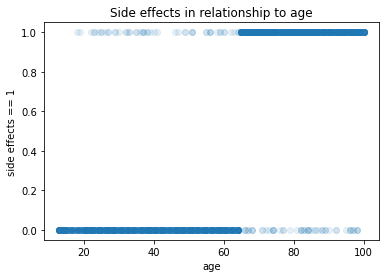

In [5]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age')
plt.ylabel('side effects == 1')
plt.show()

### Make NumPy arrays

[the video continues from 16:02](https://youtu.be/qFJeN9V1ZsI?t=962)

In [6]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)

### Shuffle the data

In [7]:
train_lables, train_samples = shuffle(train_lables, train_samples)

### Rescale the the data

We are rescaling the age data from range of (16 to 100) to (-1 to 1).

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

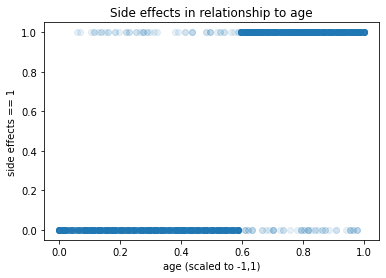

In [9]:
# This plot is not in the video, but it is useful to visualize the data
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(scaled_train_samples, train_lables, alpha=0.1)
plt.title('Side effects in relationship to age')
plt.xlabel('age (scaled to -1,1)')
plt.ylabel('side effects == 1')
plt.show()

##  Keras TensorFlow model

[the video continues from 18:39](https://youtu.be/qFJeN9V1ZsI?t=1119)

### Set up Tensorflow and Keras

To install a new Tensorflow conda enviroment in commad line:

see my [blog post](https://ukidlucas.blogspot.com/2018/10/ipykernel.html)

In [10]:
import tensorflow as tf

- [CategoricalCrossentropy class](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

### Run Tensorflow on NVidia GPU

If you have Nvidia GPU

In [12]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
num_gpu_available = len(physical_devices)
print("Num GPU Available: ", num_gpu_available)

Num GPU Available:  0


In [13]:
if (num_gpu_available > 0):
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("NVidia GPU is being used")

### Define the model layers

- input layer (not explicitly declared)
- hidden dense (fully connected) layer with (arbitrary) 16 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- hidden dense (fully connected) layer with (arbitrary) 32 nodes (units)
    - relu function returns 0 for anything below zero and value for anything above zero
- output dense (fully connected) layer with resulting (side effects, or not) 2 nodes (units)
    - softmax function returns probablity

In [14]:
model=Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Training the model
    
    
this section covers the video from [24:38](https://youtu.be/qFJeN9V1ZsI?t=1477) to 29:50.

In [16]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    batch_size=10,
    epochs=15,               # train all data x times
    shuffle=True,            # default True
    verbose=2
)

Train on 2100 samples
Epoch 1/15
2100/2100 - 0s - loss: 0.6633 - accuracy: 0.5352
Epoch 2/15
2100/2100 - 0s - loss: 0.6352 - accuracy: 0.5948
Epoch 3/15
2100/2100 - 0s - loss: 0.6089 - accuracy: 0.6357
Epoch 4/15
2100/2100 - 0s - loss: 0.5825 - accuracy: 0.6900
Epoch 5/15
2100/2100 - 0s - loss: 0.5551 - accuracy: 0.7271
Epoch 6/15
2100/2100 - 0s - loss: 0.5265 - accuracy: 0.7681
Epoch 7/15
2100/2100 - 0s - loss: 0.4973 - accuracy: 0.8019
Epoch 8/15
2100/2100 - 0s - loss: 0.4682 - accuracy: 0.8314
Epoch 9/15
2100/2100 - 0s - loss: 0.4405 - accuracy: 0.8514
Epoch 10/15
2100/2100 - 0s - loss: 0.4146 - accuracy: 0.8710
Epoch 11/15
2100/2100 - 0s - loss: 0.3911 - accuracy: 0.8800
Epoch 12/15
2100/2100 - 0s - loss: 0.3700 - accuracy: 0.8938
Epoch 13/15
2100/2100 - 0s - loss: 0.3520 - accuracy: 0.9000
Epoch 14/15
2100/2100 - 0s - loss: 0.3364 - accuracy: 0.9100
Epoch 15/15
2100/2100 - 0s - loss: 0.3231 - accuracy: 0.9152


In [18]:
result

## Validation

this section covers the video from [29:50](https://youtu.be/qFJeN9V1ZsI?t=1477) to 39:28.

Overfitting: learning well on the training data, but not able to "generalize" in order to perform on the new (validation) data.

In [43]:
result = model.fit(
    x=scaled_train_samples,
    y=train_lables,
    validation_split=0.1,
    batch_size=25,
    epochs=2000,               # train all data x times
    shuffle=True,            # default True, the prior shuffle of the training data is still needed
    verbose=1
)

Train on 1890 samples, validate on 210 samples
Epoch 1/2000
1890/1890 [==============================] - 0s 62us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 2/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2106 - val_accuracy: 0.9476
Epoch 3/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1935 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 4/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 5/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2107 - val_accuracy: 0.9476
Epoch 6/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2107 - val_accuracy: 0.9476
Epoch 7/2000
1890/1890 [==============================] - 0

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1935 - accuracy: 0.9529 - val_loss: 0.2106 - val_accuracy: 0.9476
Epoch 56/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1933 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 57/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1932 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 58/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 59/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1931 - accuracy: 0.9529 - val_loss: 0.2106 - val_accuracy: 0.9476
Epoch 60/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1934 - accuracy: 0.9529 - val_loss: 0.2106 - val_accuracy: 0.9476
Epoch 61/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1932 - accuracy: 0.9529 - val_

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1932 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 110/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1930 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 111/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1930 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 112/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1929 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 113/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1931 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 114/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1929 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 115/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1930 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1927 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 164/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1929 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 165/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1928 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 166/2000
1890/1890 [==============================] - 0s 55us/sample - loss: 0.1928 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 167/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1926 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 168/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1927 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 169/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1928 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1923 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 218/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1924 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 219/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1923 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 220/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1923 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 221/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1924 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 222/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1924 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 223/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1925 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1921 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 272/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1920 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 273/2000
1890/1890 [==============================] - 0s 42us/sample - loss: 0.1921 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 274/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1920 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 275/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1918 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 276/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1920 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 277/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1919 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1916 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 326/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1916 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 327/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1916 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 328/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1917 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 329/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1917 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 330/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1916 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 331/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1917 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1915 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 380/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1914 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 381/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2103 - val_accuracy: 0.9476
Epoch 382/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 383/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2105 - val_accuracy: 0.9476
Epoch 384/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 385/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1913 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 434/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1912 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 435/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1910 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 436/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1913 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 437/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1910 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 438/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1911 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 439/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1912 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1910 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 488/2000
1890/1890 [==============================] - 0s 43us/sample - loss: 0.1910 - accuracy: 0.9529 - val_loss: 0.2102 - val_accuracy: 0.9476
Epoch 489/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1908 - accuracy: 0.9529 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 490/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1907 - accuracy: 0.9529 - val_loss: 0.2104 - val_accuracy: 0.9476
Epoch 491/2000
1890/1890 [==============================] - 0s 51us/sample - loss: 0.1909 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 492/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1908 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 493/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1909 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 54us/sample - loss: 0.1906 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 542/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1905 - accuracy: 0.9529 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 543/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1906 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 544/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1905 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 545/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1906 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 546/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1905 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 547/2000
1890/1890 [==============================] - 0s 60us/sample - loss: 0.1905 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1901 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 596/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1903 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 597/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1902 - accuracy: 0.9529 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 598/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1903 - accuracy: 0.9529 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 599/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1903 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 600/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1903 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 601/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1905 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 43us/sample - loss: 0.1903 - accuracy: 0.9529 - val_loss: 0.2100 - val_accuracy: 0.9476
Epoch 650/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1905 - accuracy: 0.9529 - val_loss: 0.2097 - val_accuracy: 0.9476
Epoch 651/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1900 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 652/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1900 - accuracy: 0.9529 - val_loss: 0.2098 - val_accuracy: 0.9476
Epoch 653/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1901 - accuracy: 0.9529 - val_loss: 0.2097 - val_accuracy: 0.9476
Epoch 654/2000
1890/1890 [==============================] - 0s 52us/sample - loss: 0.1901 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 655/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1901 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 44us/sample - loss: 0.1898 - accuracy: 0.9529 - val_loss: 0.2097 - val_accuracy: 0.9476
Epoch 704/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1899 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 705/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1899 - accuracy: 0.9529 - val_loss: 0.2097 - val_accuracy: 0.9476
Epoch 706/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1899 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 707/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1899 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 708/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1898 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 709/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1899 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1897 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 758/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2095 - val_accuracy: 0.9476
Epoch 759/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 760/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2101 - val_accuracy: 0.9476
Epoch 761/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1898 - accuracy: 0.9529 - val_loss: 0.2096 - val_accuracy: 0.9476
Epoch 762/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2095 - val_accuracy: 0.9476
Epoch 763/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1897 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2095 - val_accuracy: 0.9476
Epoch 812/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1894 - accuracy: 0.9529 - val_loss: 0.2099 - val_accuracy: 0.9476
Epoch 813/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1896 - accuracy: 0.9529 - val_loss: 0.2093 - val_accuracy: 0.9476
Epoch 814/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1895 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 815/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1895 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 816/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1895 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 817/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1895 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 866/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 867/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2093 - val_accuracy: 0.9476
Epoch 868/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1894 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 869/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1893 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 870/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1891 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 871/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1898 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 50us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2095 - val_accuracy: 0.9476
Epoch 920/2000
1890/1890 [==============================] - 0s 50us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 921/2000
1890/1890 [==============================] - 0s 54us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 922/2000
1890/1890 [==============================] - 0s 52us/sample - loss: 0.1891 - accuracy: 0.9529 - val_loss: 0.2093 - val_accuracy: 0.9476
Epoch 923/2000
1890/1890 [==============================] - 0s 53us/sample - loss: 0.1890 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 924/2000
1890/1890 [==============================] - 0s 53us/sample - loss: 0.1891 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 925/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1891 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1890 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 974/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 975/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1890 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 976/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1891 - accuracy: 0.9529 - val_loss: 0.2093 - val_accuracy: 0.9476
Epoch 977/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2093 - val_accuracy: 0.9476
Epoch 978/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 979/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1889 - accuracy: 0.9529 

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1891 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1028/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1892 - accuracy: 0.9529 - val_loss: 0.2090 - val_accuracy: 0.9476
Epoch 1029/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 1030/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1890 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1031/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1032/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1889 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1033/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1888 - accuracy: 0

1890/1890 [==============================] - 0s 49us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1082/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1083/2000
1890/1890 [==============================] - 0s 59us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1084/2000
1890/1890 [==============================] - 0s 57us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1085/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1086/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1087/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1887 - accuracy: 0

1890/1890 [==============================] - 0s 48us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1136/2000
1890/1890 [==============================] - 0s 50us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1137/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1138/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1139/2000
1890/1890 [==============================] - 0s 51us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1140/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1141/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1887 - accuracy: 0

1890/1890 [==============================] - 0s 45us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2090 - val_accuracy: 0.9476
Epoch 1190/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1191/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1192/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1193/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1194/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1195/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1886 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1244/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1245/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2094 - val_accuracy: 0.9476
Epoch 1246/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1247/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1248/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1249/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1886 - accuracy: 0

1890/1890 [==============================] - 0s 48us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1298/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1299/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1300/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1301/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1302/2000
1890/1890 [==============================] - 0s 50us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2092 - val_accuracy: 0.9476
Epoch 1303/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1887 - accuracy: 0

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1352/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1353/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1354/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2090 - val_accuracy: 0.9476
Epoch 1355/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2090 - val_accuracy: 0.9476
Epoch 1356/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1357/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1888 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1406/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1407/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1408/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1409/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1410/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1411/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1460/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1461/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1462/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1463/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2087 - val_accuracy: 0.9476
Epoch 1464/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1465/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1514/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1515/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1516/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1881 - accuracy: 0.9529 - val_loss: 0.2091 - val_accuracy: 0.9476
Epoch 1517/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1518/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1519/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1568/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1569/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1570/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1571/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1572/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1573/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1622/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1623/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1624/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1625/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1626/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1627/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1885 - accuracy: 0

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1676/2000
1890/1890 [==============================] - 0s 44us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1677/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1678/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1679/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1680/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2089 - val_accuracy: 0.9476
Epoch 1681/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1730/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1731/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2086 - val_accuracy: 0.9476
Epoch 1732/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1733/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1888 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1734/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1735/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1784/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1887 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1785/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1786/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1787/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1879 - accuracy: 0.9529 - val_loss: 0.2088 - val_accuracy: 0.9476
Epoch 1788/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1885 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1789/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1884 - accuracy: 0

1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1838/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1839/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1840/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1884 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1841/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1842/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1843/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1881 - accuracy: 0

1890/1890 [==============================] - 0s 49us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2082 - val_accuracy: 0.9476
Epoch 1892/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1881 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1893/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1894/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1881 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1895/2000
1890/1890 [==============================] - 0s 47us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1896/2000
1890/1890 [==============================] - 0s 49us/sample - loss: 0.1881 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1897/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0

1890/1890 [==============================] - 0s 48us/sample - loss: 0.1881 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1946/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1947/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2083 - val_accuracy: 0.9476
Epoch 1948/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 1949/2000
1890/1890 [==============================] - 0s 45us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1950/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1882 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476
Epoch 1951/2000
1890/1890 [==============================] - 0s 48us/sample - loss: 0.1881 - accuracy: 0

1890/1890 [==============================] - 0s 47us/sample - loss: 0.1886 - accuracy: 0.9529 - val_loss: 0.2084 - val_accuracy: 0.9476
Epoch 2000/2000
1890/1890 [==============================] - 0s 46us/sample - loss: 0.1883 - accuracy: 0.9529 - val_loss: 0.2085 - val_accuracy: 0.9476


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


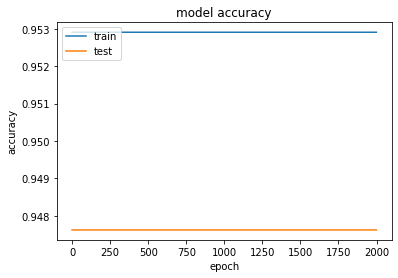

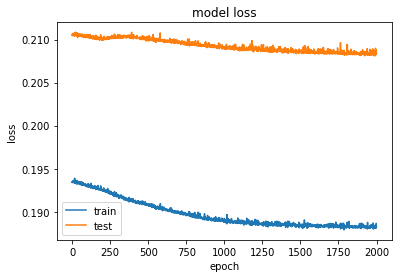

In [44]:
print(result.history.keys())

plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

## Prediction (Inference)

this section covers the video from [39:28](https://youtu.be/qFJeN9V1ZsI?t=2368) to 39:14.